# Data Project - Stock Price Analysis

## By: Anita Maskara

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Logistic Regression Model">Logistic Regression Model</a></li> 
</ul>

<a id='intro'></a>
## Introduction

In this project we will be looking at data from the stock market, particularly some technology stocks. We will use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?<br>
2.) What was the daily return of the stock on average?<br>
3.) What was the moving average of the various stocks?<br>
4.) What was the correlation between different stocks' closing prices?<br>
4.) What was the correlation between different stocks' daily returns?<br>
5.) How much value do we put at risk by investing in a particular stock?<br>
6.) How can we attempt to predict future stock behavior?

<a id='wrangling'></a>
## Data Wrangling

**Setup**

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

In [3]:
!pip install pandas-datareader

In [4]:
from pandas_datareader import data, wb

import pandas_datareader as pdr


In [5]:
from datetime import datetime

In [6]:
from __future__ import division

### Gathering data

In [7]:
# list of tickers of technology stocks
tech_stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
# setting the start_date as 1 year before from end_date and end_date as today
end_date = datetime.now()

start_date = datetime(end_date.year -1, end_date.month, end_date.day)

In [11]:
# Getting the data

for stock in tech_stocks:
    globals()[stock] = pdr.get_data_yahoo(stock,start_date, end_date)

globals() is taking that ticker and making it a global variable. It was setting that 'AAPL' or 'GOOG' as a dataframe.

get_data_yahoo() : 1st parameter is the ticker, 2nd is start_date and 3rd is end_date

### Assessing data

In [12]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-13,210.949997,207.699997,209.309998,208.869995,25890900.0,205.678345
2018-08-14,210.559998,208.259995,210.160004,209.750000,20748000.0,206.544891
2018-08-15,210.740005,208.330002,209.220001,210.240005,28807600.0,207.027420
2018-08-16,213.809998,211.470001,211.750000,213.320007,28500400.0,210.060333
2018-08-17,217.949997,213.160004,213.440002,217.580002,35427000.0,214.255234


In [13]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,194.928160,190.914200,192.891080,192.939360,3.279245e+07,191.076524
std,22.002101,21.777364,21.863323,21.832661,1.386246e+07,21.403579
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.902496,173.362499,174.737499,174.757500,2.328460e+07,173.279305
50%,198.750000,193.805000,196.364998,196.345001,2.983480e+07,195.165611
75%,210.715004,207.304996,209.490002,209.079994,3.897412e+07,207.620564
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,228.523819


In [14]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-13,1249.272949,1233.640991,1236.979980,1235.010010,997300,1235.010010
2018-08-14,1245.869995,1225.109985,1235.189941,1242.099976,1348100,1242.099976
2018-08-15,1235.239990,1209.510010,1229.260010,1214.380005,1828800,1214.380005
2018-08-16,1226.000000,1202.550049,1224.729980,1206.489990,1343200,1206.489990
2018-08-17,1209.020020,1188.239990,1202.030029,1200.959961,1389600,1200.959961


In [15]:
MSFT.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-05,125.870003,124.209999,124.949997,125.830002,24926100.0,125.830002
2019-02-12,107.139999,105.480003,106.139999,106.889999,25056600.0,106.042915
2018-08-24,108.559998,107.559998,107.669998,108.400002,17234000.0,107.078369
2019-05-21,127.529999,126.580002,127.430000,126.900002,15293300.0,126.900002
2018-12-27,101.190002,96.400002,99.300003,101.180000,49498500.0,100.378166


In [16]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-13,1925.000000,1893.670044,1898.500000,1896.199951,5531500,1896.199951
2018-08-14,1921.010010,1900.000000,1919.390015,1919.650024,3986100,1919.650024
2018-08-15,1916.209961,1869.790039,1909.550049,1882.619995,7700700,1882.619995
2018-08-16,1905.000000,1883.550049,1903.939941,1886.520020,3957100,1886.520020
2018-08-17,1888.000000,1855.550049,1885.800049,1882.219971,4104300,1882.219971


**We will use Adj Close for our data analysis**

<a id='eda'></a>
## Exploratory Data Analysis

Variable: Adj Close

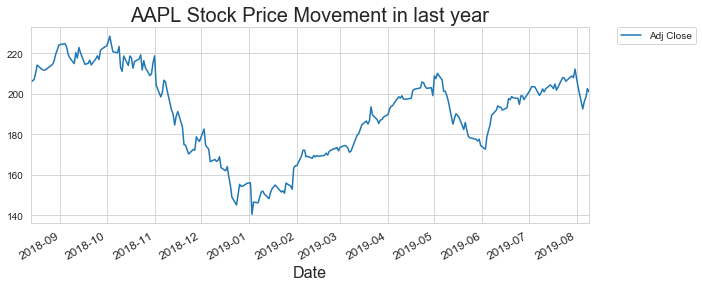

In [17]:
plt.figure(figsize=(10,4))
AAPL['Adj Close'].plot(legend=True)
plt.title('AAPL Stock Price Movement in last year', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.xticks(fontsize=12)
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Variable: Volume

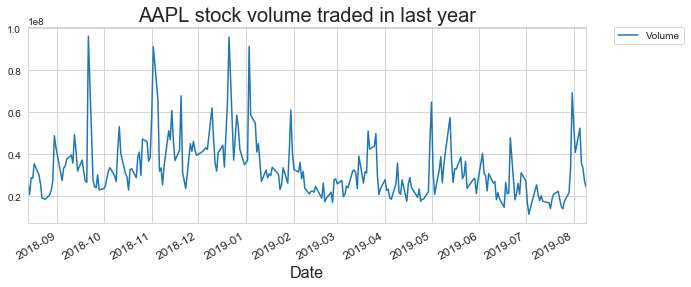

In [18]:
plt.figure(figsize=(10,4))
AAPL['Volume'].plot(legend=True)
plt.title('AAPL stock volume traded in last year', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.xticks(fontsize=12)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**Calculate moving average**

In [21]:
ma_day = [10,20,50]

for days in ma_day:
    column_name = 'MA for %s days' %str(days)
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(days).mean()

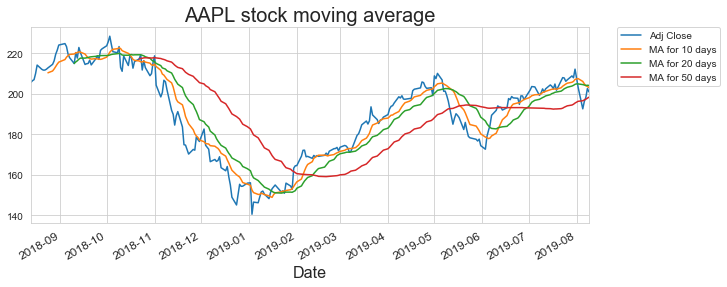

In [27]:
AAPL[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))
plt.title('AAPL stock moving average', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.xticks(fontsize=12)


# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

As you take moving average for more number of days, the line becomes smoother because it is not as reliant on daily fluctuations

**Analyze Daily Returns and Risk**

In [28]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

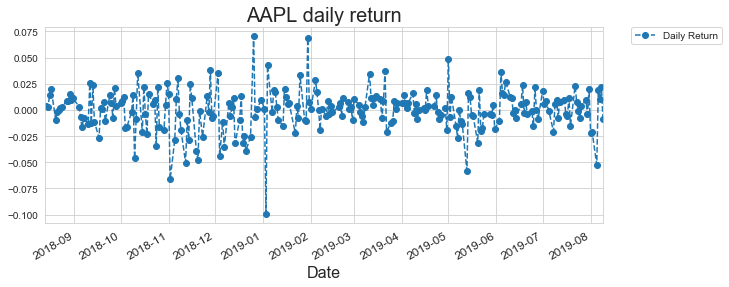

In [33]:
plt.figure(figsize=(10,4))
AAPL['Daily Return'].plot(legend=True, linestyle='--', marker ='o')
plt.title('AAPL daily return', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.xticks(fontsize=12)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**Average daily return for AAPL**

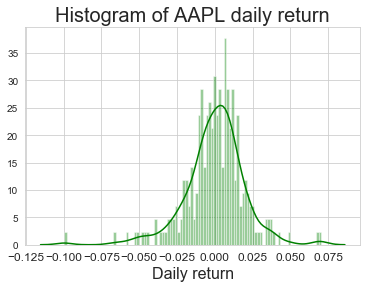

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='green')
plt.title('Histogram of AAPL daily return', fontsize=20)
plt.xlabel('Daily return', fontsize=16)
plt.xticks(fontsize=12);

Histogram of daily return for the past year looks little skewed to the left. 

**Calculating daily return for all the stocks**

In [38]:
# Getting just the Adj Close of the tech stocks from yahoo
closing_df = pdr.get_data_yahoo(tech_stocks,start_date, end_date)['Adj Close']

In [39]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-13,205.678345,1896.199951,1235.010010,106.480911
2018-08-14,206.544891,1919.650024,1242.099976,107.809334
2018-08-15,207.027420,1882.619995,1214.380005,106.347382
2018-08-16,210.060333,1886.520020,1206.489990,106.327629
2018-08-17,214.255234,1882.219971,1200.959961,106.268364


So now that we have the closing prices, we can calculate the daily return for all the stocks

In [40]:
daily_return = closing_df.pct_change()

In [41]:
daily_return.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-08-13,NaN,NaN,NaN,NaN
2018-08-14,0.004213,0.012367,0.005741,0.012476
2018-08-15,0.002336,-0.019290,-0.022317,-0.013561
2018-08-16,0.014650,0.002072,-0.006497,-0.000186
2018-08-17,0.019970,-0.002279,-0.004584,-0.000557


**to see the correlation between these stocks**

''

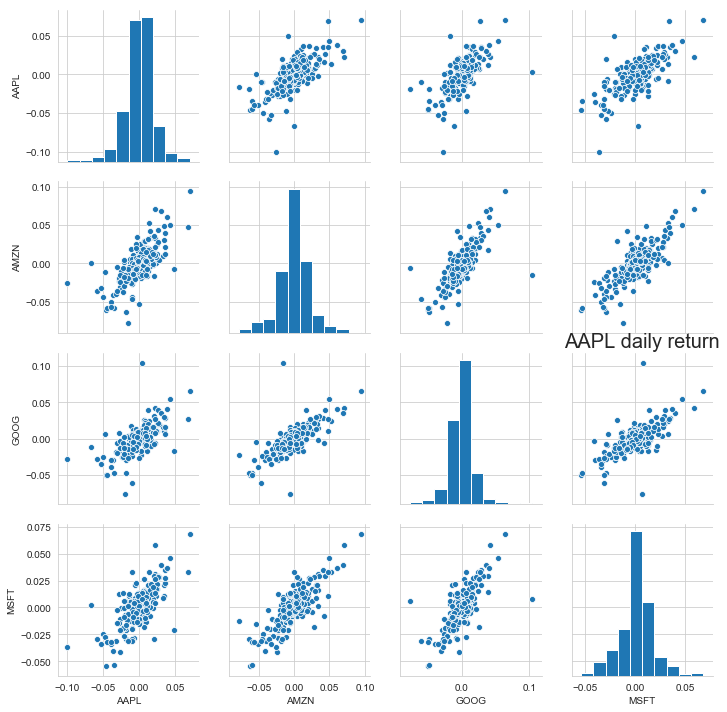

In [52]:
sns.pairplot(daily_return.dropna())
plt.title('AAPL daily return', fontsize=20)
plt.xticks(fontsize=12);

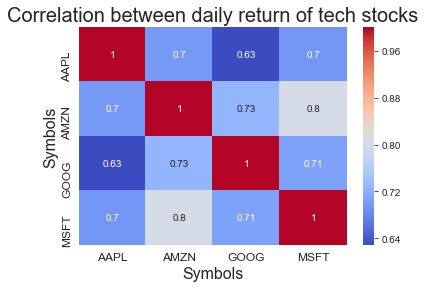

In [58]:
sns.heatmap(daily_return.corr(), cmap='coolwarm', annot = True)
plt.title('Correlation between daily return of tech stocks', fontsize=20)
plt.xlabel('Symbols', fontsize=16)
plt.ylabel('Symbols', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

MSFT and AMZN have the highest positive correlation of 0.8 

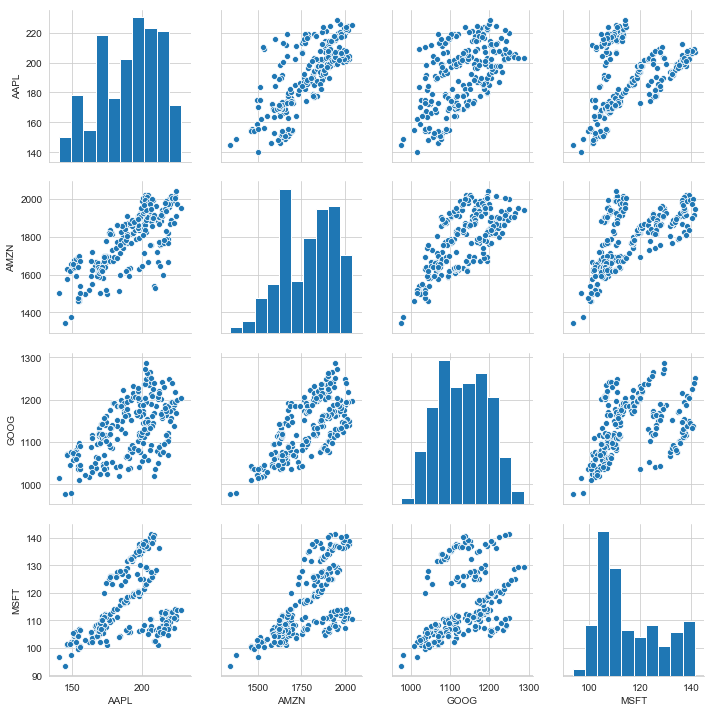

In [57]:
sns.pairplot(closing_df.dropna())
plt.xticks(fontsize=12);

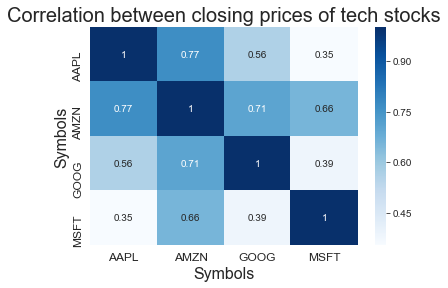

In [66]:
sns.heatmap(closing_df.dropna().corr(), cmap='Blues', annot = True)
plt.title('Correlation between closing prices of tech stocks', fontsize=20)
plt.xlabel('Symbols', fontsize=16)
plt.ylabel('Symbols', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Correlation between closing prices of AMZN and AAPL & AMZN and GOOG is strong.

**Risk analysis**

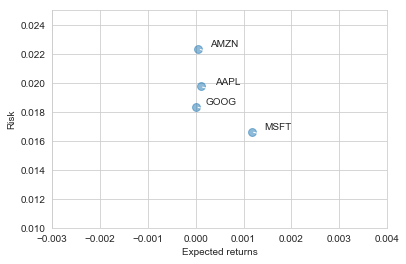

In [76]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = daily_return.dropna()

area = np.pi*20 # to set the size of the dot for each stock on the plot

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (40, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

We should be interested in a stock that has higher expected return and lower risk. 

**Value at risk**

We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There are several methods we can use for estimating a value at risk. 

> **Value at risk using the "bootstrap" method**<br>
For this method we will calculate the empirical quantiles from a histogram of daily returns.

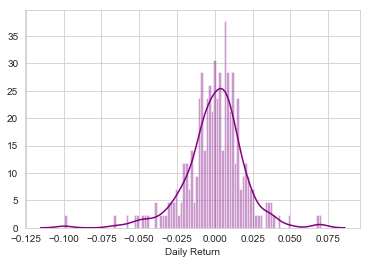

In [78]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple');

In [84]:
# The 0.05 empirical quantile of daily returns
print('The 0.05 empirical quantile of daily returns for AAPL is:{}'.format(daily_return['AAPL'].quantile(0.05)))
print('The 0.05 empirical quantile of daily returns for GOOG is:{}'.format(daily_return['GOOG'].quantile(0.05)))
print('The 0.05 empirical quantile of daily returns for AMZN is:{}'.format(daily_return['AMZN'].quantile(0.05)))
print('The 0.05 empirical quantile of daily returns for MSFT is:{}'.format(daily_return['MSFT'].quantile(0.05)))

The 0.05 empirical quantile of daily returns for AAPL is:-0.031706554147198696
The 0.05 empirical quantile of daily returns for GOOG is:-0.027351269345789443
The 0.05 empirical quantile of daily returns for AMZN is:-0.039148372850264956
The 0.05 empirical quantile of daily returns for MSFT is:-0.029685727398167064


The 0.05 empirical quantile of daily returns of AAPL is at -0.03. That means that with 95% confidence or 95% of times, our worst daily loss will not exceed 3.17%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0317 * 1,000,000 = $31,700

> **Value at risk using the Monte Carlo method**<br>

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.
To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [89]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [95]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

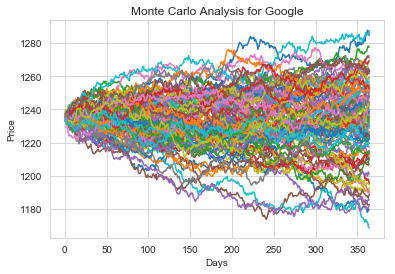

In [102]:
# Get start price from GOOG.head()
start_price = 1235

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google');

Let's go ahead and get a histogram of the end results for a much larger run. 

In [103]:
# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use quantile to define our risk for this stock.

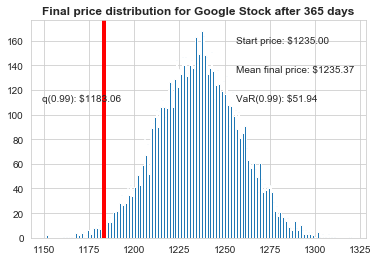

In [104]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');